In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pandas as pd

In [2]:
!ls /media/Data_storage/Mobilcell/DayGraphAnalytics

graph_global_attributes_directed_20181201.json
graph_global_attributes_directed_20181202.json
graph_global_attributes_directed_20181203.json
graph_global_attributes_directed_20181204.json
graph_global_attributes_directed_20181205.json
graph_global_attributes_directed_20181206.json
graph_global_attributes_directed_20181207.json
graph_global_attributes_directed_20181208.json
graph_global_attributes_directed_20181209.json
graph_global_attributes_directed_20181210.json
graph_global_attributes_directed_20181211.json
graph_global_attributes_directed_20181212.json
graph_global_attributes_directed_20181213.json
graph_global_attributes_directed_20181214.json
graph_global_attributes_directed_20181215.json
graph_global_attributes_directed_20181216.json
graph_global_attributes_directed_20181217.json
graph_global_attributes_directed_20181218.json
graph_global_attributes_directed_20181219.json
graph_global_attributes_directed_20181220.json
graph_global_attributes_directed_20181221.json
graph_global_

In [3]:
source = '/media/Data_storage/Mobilcell/DayGraphAnalytics/'

In [4]:
files = np.array([ i for i in os.listdir(source) if 'global_attributes_directed' in i ])
files.shape

(365,)

dict_keys(['num_vertices_graph', 'num_vertices_config', 'num_edges_graph', 'num_edges_config', 'assortativity_graph', 'assortativity_config', 'scalar_assortativity_graph', 'scalar_assortativity_config', 'pseudo_diameter_graph', 'pseudo_diameter_config', 'min_spanning_tree_graph', 'min_spanning_tree_config', 'global_clustering_graph', 'global_clustering_config', 'vertex_percolation_graph', 'vertex_percolation_config', 'edge_percolation_graph', 'edge_percolation_config']

In [5]:
def plot_value_in_time(key1='global_clustering_graph', key2='value'):
    temp = []
    for n in range(files.shape[0]):
        with open(source+files[n]) as json_file:
            data = json.load(json_file)
            temp.append( data[key1][key2] )
    temp = np.array(temp)
    
    dates = np.array([ str(k)[:10] for k in pd.date_range(start="2018-12-01",end="2019-11-30").values ] )
    
    plt.figure()
    plt.plot(temp)
    plt.xticks( ticks=np.arange(365)[::30], labels=dates[::30], rotation=90 )

    plt.figure()
    plt.plot( pd.DataFrame(temp).rolling(7).mean().dropna().values )
    plt.xticks( ticks=np.arange(365)[::30], labels=dates[::30], rotation=90 )
    
    return temp

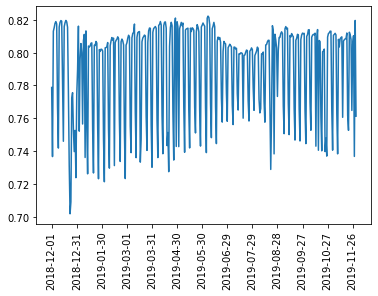

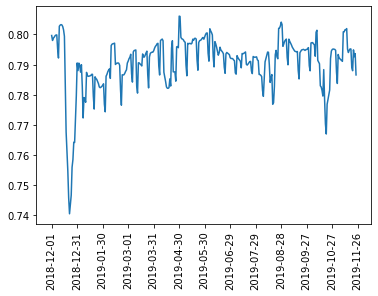

In [6]:
global_cluster_graph = plot_value_in_time()

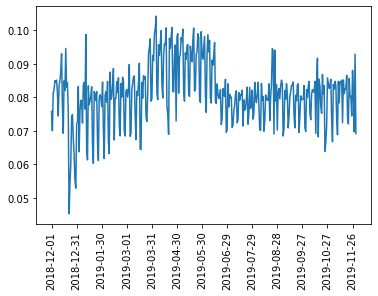

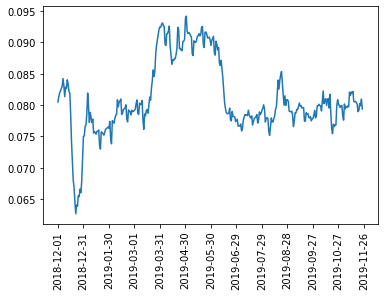

In [7]:
global_cluster_config = plot_value_in_time(key1='global_clustering_config')

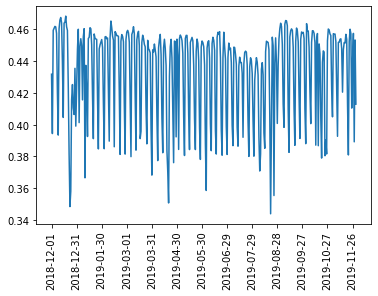

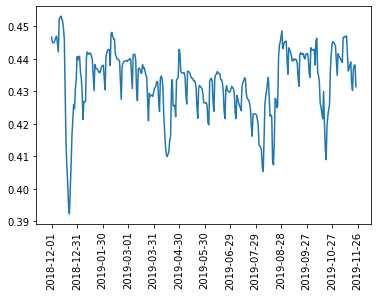

In [8]:
scalar_assort_graph = plot_value_in_time( key1='scalar_assortativity_graph')

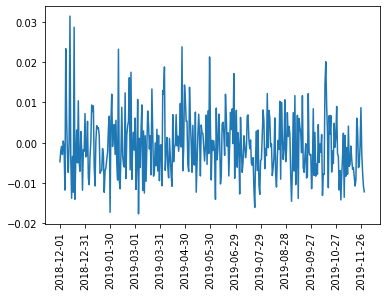

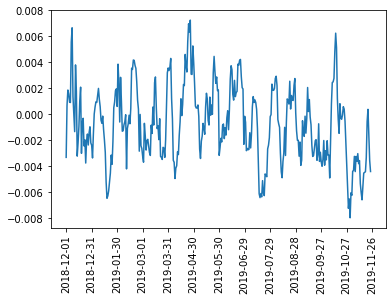

In [9]:
scalar_assort_config = plot_value_in_time( key1='scalar_assortativity_config')

In [10]:
np.corrcoef( global_cluster_graph, scalar_assort_graph )

array([[1.        , 0.93698572],
       [0.93698572, 1.        ]])

In [11]:
np.corrcoef( global_cluster_config, scalar_assort_config )

array([[1.        , 0.20447906],
       [0.20447906, 1.        ]])

In [12]:
np.corrcoef( global_cluster_graph, global_cluster_config )

array([[1.        , 0.77933544],
       [0.77933544, 1.        ]])

#### Degree correlations

In [50]:
from scipy.optimize import curve_fit

In [51]:
source_graphs = '/media/Data_storage/Mobilcell/DayGraphData/'
files_graphs = np.array([ i for i in os.listdir(source_graphs) if '' in i ])
files_graphs.shape

(365,)

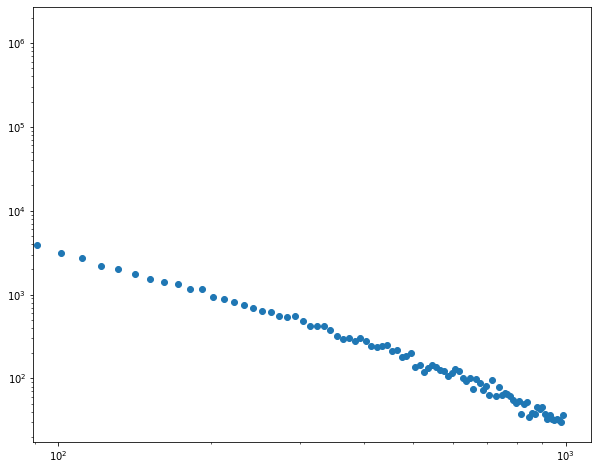

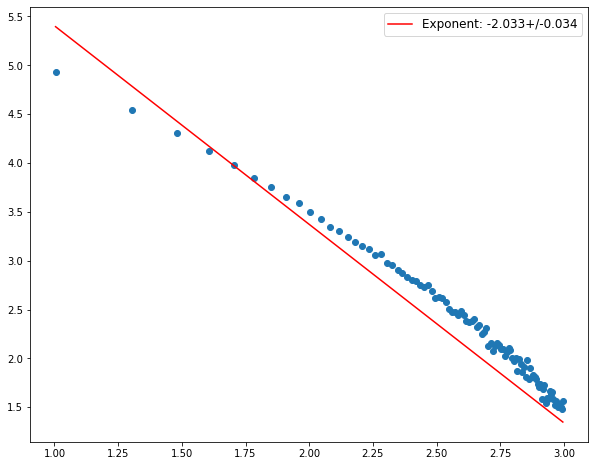

In [62]:
# https://stackoverflow.com/questions/37170511/scaled-logarithmic-binning-in-python
# log-scaled bins
plt.figure( figsize=(10,8) )
#bins = np.logspace(1, 4, 100)
bins = np.linspace( 0, 1000, 100 )
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram( pd.read_csv( source_graphs+files_graphs[10], delimiter=',' ).weight.values, 
                     bins=bins )
#hist = np.histogram( tower_data_year[:,3], bins=bins)
# normalize by bin width
hist_norm = hist[0]#/widths

# plot it!
#plt.bar(bins[:-1], hist_norm, widths)
plt.scatter(bins[:-1], hist_norm)
plt.xscale('log')
plt.yscale('log')
#plt.xlabel('EOVX standard deviation of tower positions throughout the year')
#plt.ylabel('Number of towers')

rounding = 3
plt.figure( figsize=(10,8) )
plt.plot( np.log10( bins[:-1][1:] ), popt[0]*np.log10( bins[:-1][1:] )+popt[1], '-', c='r', 
         label='Exponent: '+str( np.round(popt[0], rounding) )+'+/-'+str( np.round( np.sqrt(pcov[0,0]) , rounding) ) )
plt.legend( fontsize=12 )
plt.scatter( np.log10( bins[:-1][1:] ), np.log10(hist_norm[1:]) )

In [63]:
def linfit( x, a, b ):
    return a*x+b

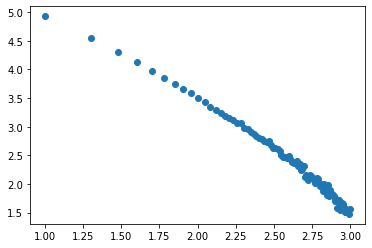

In [64]:
plt.scatter( np.log10( bins[:-1][1:] ), np.log10(hist_norm[1:]) )

popt, pcov = curve_fit( linfit, np.log10( bins[:-1][1:] ), np.log10(hist_norm[1:]) )


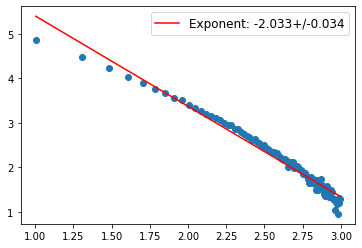

In [55]:
rounding = 3
plt.plot( np.log10( bins[:-1][1:] ), popt[0]*np.log10( bins[:-1][1:] )+popt[1], '-', c='r', 
         label='Exponent: '+str( np.round(popt[0], rounding) )+'+/-'+str( np.round( np.sqrt(pcov[0,0]) , rounding) ) )
plt.legend( fontsize=12 )
plt.scatter( np.log10( bins[:-1][1:] ), np.log10(hist_norm[1:]) )